# Exoplanets

##### data source: https://catalogs.mast.stsci.edu/eaot#

In [72]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import datetime
from datetime import datetime, timedelta
from matplotlib.ticker import FuncFormatter
import os

In [75]:
pfad = str(os.path.abspath(os.getcwd()))+ "\\"
print(pfad)

D:\Github\Science\Exoplanets\


In [61]:
now = datetime.now()
now = now.strftime("%Y-%m-%d")
now


# bubble: Rp
# y: Tday
# x: Distance

'2022-07-26'

### dataframe - column legend

In [62]:
# Rp: Planet radius                                       [Jupiter Radia]
# Mp: Planet mass                                         [Jupiter Masses]
# Tday: Planet Dayside Temperature                        [Kelvin]
# Teq: Planet equillibrium Temperature                    [Kelvin]
# log10g_p Planet surface gravity                         [unknown - 1.0 = earth?]
# Period Planet orbit period                              [days]
# K_mag: K-band magnitude                                 [unknown - microns?]
#    https://en.wikipedia.org/wiki/K_band_(infrared)
# Distance: Star distance to earth                        [parsec]
# Teff: Star Surface Temperature                          [Kelvin]
# log10g_s: Star Surface Gravity                          [Kelvin]

### options

In [63]:
bool_period_Earth = True

### import

In [64]:
pfad = "D:\\Github\\Science\\Exoplanets\\"

df = pd.read_csv(pfad + "search.csv", sep=",")
df = df.drop(columns=['SNR_Emission_15_micron',
                      'SNR_Emission_5_micron',
                      'SNR_Transmission_K_mag',
                      'Transit_Flag',
                      'Catalog_Name',
                      'Transit_Duration',
#                      'log10g_s',
#                       '',
#                       '',
#                       '',
#                       '',
                     ])
df.head(2)

,Planet_Name,Rp,Mp,Tday,Teq,log10g_p,Period,K_mag,Distance,Teff,log10g_s
0,OGLE-2018-BLG-1011L b,1.20,1.80000,NaN,NaN,3.491,NaN,NaN,7100.00,NaN,NaN
1,GJ 15 A c,0.59,0.11327,55.0,46.0,2.899,7600.0,4.0,3.56,3607.0,4.87


### calculation

In [65]:
# radius planet (Jupiter radia -> km)

r_Jupiter = 69_911
r_Earth = 6_371
df['Rp_km'] = df['Rp'] * r_Jupiter
df['Rp_ERadia'] = round(df['Rp'] * ( r_Jupiter / r_Earth) , 2)

Parsec_In_Lightyears = 3.26156
df['Distance_LJ'] = round(df['Distance'] * Parsec_In_Lightyears , 2)


df = df.drop(columns=['Rp',
                      'Rp_km',
                      'Distance'])

period_Earth = 365
df['period_Earth'] = period_Earth
                      
df.head(2)

,Planet_Name,Mp,Tday,Teq,log10g_p,Period,K_mag,Teff,log10g_s,Rp_ERadia,Distance_LJ,period_Earth
0,OGLE-2018-BLG-1011L b,1.80000,NaN,NaN,3.491,NaN,NaN,NaN,NaN,13.17,23157.08,365
1,GJ 15 A c,0.11327,55.0,46.0,2.899,7600.0,4.0,3607.0,4.87,6.47,11.61,365


### Filter

In [66]:
# filter_entfernung = 100_000_000_000
# df = df.loc[df["Distance_LJ"] < filter_entfernung]

filter_Rp_ERadia = 2
df = df.loc[df["Rp_ERadia"] < filter_Rp_ERadia]

print(df["Period"].max())

df.head(2)

10140.0


,Planet_Name,Mp,Tday,Teq,log10g_p,Period,K_mag,Teff,log10g_s,Rp_ERadia,Distance_LJ,period_Earth
7,Kepler-1697 b,0.00668,526.0,442.0,3.121,33.4969,11.2,4682.0,4.54,1.21,808.12,365
30,GJ 3323 b,0.00636,346.0,291.0,3.123,5.3636,6.7,3159.0,NaN,1.21,17.51,365


In [67]:
dict_Earth = {'Planet_Name': 'Earth',
        'Mp': '',
        'Tday': '',
        'Teq': 286.9,
        'log10g_p': '',
        'Period': 365,
        'K_mag': '',
        'Teff': '',
        'Rp_ERadia': 1.0,
        'Distance_LJ': 1,
        'period_Earth': 365
       }

dict_Mercury = {'Planet_Name': 'Mercury',
        'Mp': '',
        'Tday': '',
        'Teq': 750,
        'log10g_p': '',
        'Period': 87.9691,
        'K_mag': '',
        'Teff': '',
        'Rp_ERadia': 0.3829,
        'Distance_LJ': 1,
        'period_Earth': 365
       }

dict_Mars = {'Planet_Name': 'Mars',
        'Mp': '',
        'Tday': '',
        'Teq': 260,
        'log10g_p': '',
        'Period': 686.980,
        'K_mag': '',
        'Teff': '',
        'Rp_ERadia': 0.533,
        'Distance_LJ': 1,
        'period_Earth': 365
       }

dict_Venus = {'Planet_Name': 'Venus',
        'Mp': '',
        'Tday': '',
        'Teq': 737,
        'log10g_p': '',
        'Period': 224.701,
        'K_mag': '',
        'Teff': '',
        'Rp_ERadia': 0.9499,
        'Distance_LJ': 1,
        'period_Earth': 365
       }


df = df.append(dict_Earth, ignore_index = True)
df = df.append(dict_Mercury, ignore_index = True)
df = df.append(dict_Mars, ignore_index = True)
df = df.append(dict_Venus, ignore_index = True)

max_größe = df["Rp_ERadia"].max()
df["marker_size"] = 30 * (df["Rp_ERadia"] / max_größe)
max_größe

df.head(-1)

,Planet_Name,Mp,Tday,Teq,log10g_p,Period,K_mag,Teff,log10g_s,Rp_ERadia,Distance_LJ,period_Earth,marker_size
0,Kepler-1697 b,0.00668,526,442.0,3.121,33.4969,11.2,4682,4.54,1.2100,808.12,365,18.333333
1,GJ 3323 b,0.00636,346,291.0,3.123,5.3636,6.7,3159,NaN,1.2100,17.51,365,18.333333
2,GJ 667 C g,0.014,NaN,NaN,3.044,256.2000,6,3350,4.69,1.9800,23.61,365,30.000000
3,HD 20794 d,0.015,502,422.0,3.05,90.3090,2.6,5401,4.22,1.9800,19.57,365,30.000000
4,K2-169 b,0.00681,NaN,NaN,3.114,6.3808,10.4,5548,4.56,1.2100,769.30,365,18.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1666,K2-407 b,0.0069,NaN,NaN,3.119,4.9419,10.2,5563,4.45,1.2100,712.26,365,18.333333
1667,K2-392 b,0.0128,NaN,NaN,3.066,15.3987,11.2,5726,4.31,1.8700,1327.42,365,28.333333
1668,Earth,,,286.9,,365.0000,,,NaN,1.0000,1.00,365,15.151515
1669,Mercury,,,750.0,,87.9691,,,NaN,0.3829,1.00,365,5.801515


### Visualize 1

<Figure size 576x396 with 0 Axes>

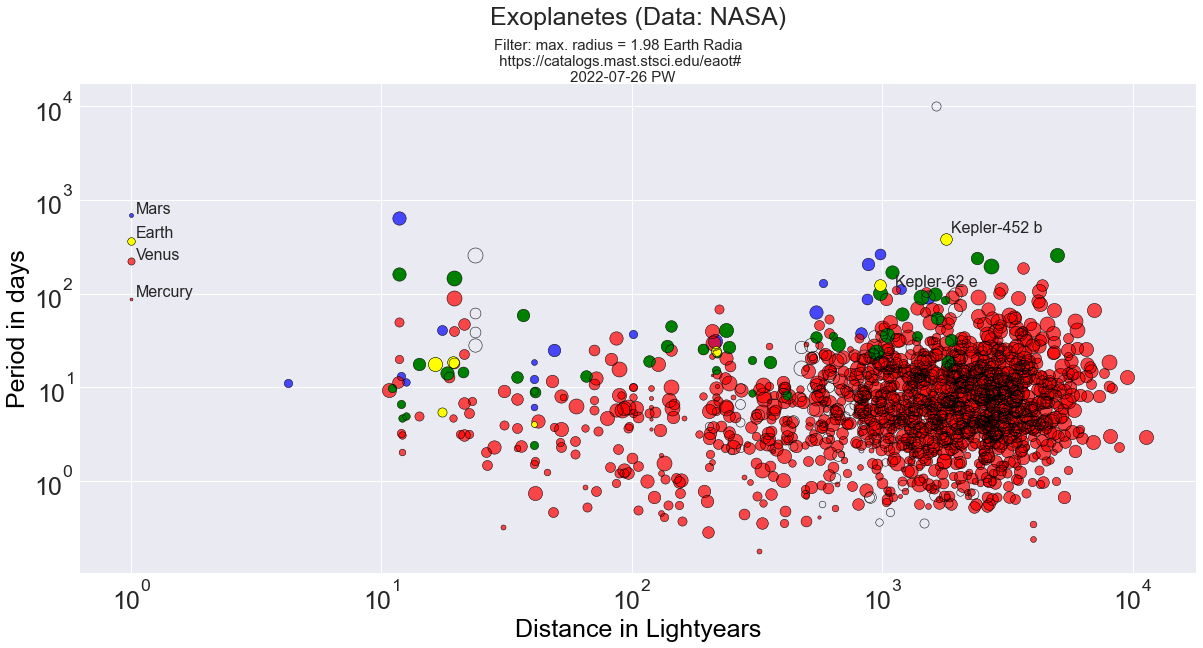

In [68]:
plt.clf()

def y_axis_thousands(x, pos):
    # 'The two args are the value and tick position'
    return '{:0,d}'.format(int(x)).replace(",", ".")

plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(20, 9))
formatter = FuncFormatter(y_axis_thousands)
ax.yaxis.set_major_formatter(formatter)

# Temperature < 100°C
[ax.plot(
         row['Distance_LJ'], row['Period'], '.', 
         markersize=row['marker_size']*1, 
         alpha=0.7, 
         color = "blue" if row['Teq'] <= 273 else 'None',
         label = "") for idx, row in df.iterrows()]

# Temperature > 100°C
[ax.plot(
         row['Distance_LJ'], row['Period'], '.', 
         markersize=row['marker_size']*1, 
         alpha=0.7, 
         color = "red" if row['Teq'] >= 373 else 'None',
         label = "") for idx, row in df.iterrows()]

# Temperature 0°C to 100°C
[ax.plot(
         row['Distance_LJ'], row['Period'], '.', 
         markersize=row['marker_size']*1, 
         alpha=1, 
         color = "green" if 273 <= row['Teq'] <= 373 else 'None',
         label = "") for idx, row in df.iterrows()]

# Temperature 0°C to 100°C
[ax.plot(
         row['Distance_LJ'], row['Period'], '.', 
         markersize=row['marker_size']*1, 
         alpha=1, 
         color = "yellow" if 282 <= row['Teq'] <= 292 else 'None',
         markeredgewidth=0.5,
         markeredgecolor = 'black',
         label = "") for idx, row in df.iterrows()]

ax.set_xlabel("Distance in Lightyears", color="black", fontsize=25)
ax.set_ylabel("Period in days", color="black", fontsize=25)
ax.set_yscale('log')
ax.set_xscale('log')

ax.tick_params(labelsize=25)

# plt.legend(loc='center',
#            bbox_to_anchor=(0.5, -0.25),
#            fancybox=True,
#            shadow=True,
#            ncol=3,
#            fontsize=20)

plt.title(f' Exoplanetes (Data: NASA) \n\n', fontsize=25)


# place a text box in upper left in axes coords
#      (x, y)
ax.text(0.05, 0.76, "Mars", transform=ax.transAxes, fontsize=16, verticalalignment='top')
ax.text(0.05, 0.71, "Earth", transform=ax.transAxes, fontsize=16, verticalalignment='top')
ax.text(0.05, 0.665, "Venus", transform=ax.transAxes, fontsize=16, verticalalignment='top')
ax.text(0.05, 0.59, "Mercury", transform=ax.transAxes, fontsize=16, verticalalignment='top')
ax.text(0.78, 0.72, "Kepler-452 b", transform=ax.transAxes, fontsize=16, verticalalignment='top')
ax.text(0.73, 0.61, "Kepler-62 e", transform=ax.transAxes, fontsize=16, verticalalignment='top')



plt.suptitle(f'Filter: max. radius = {max_größe} Earth Radia \n https://catalogs.mast.stsci.edu/eaot# \n {now} PW', fontsize=15, y=0.95)

plt.savefig(f'{pfad}Exeoplanets_1.png', dpi=300, bbox_inches='tight')


In [69]:
# df.to_excel(pfad+"output.xlsx")

In [70]:
df.head(2)

,Planet_Name,Mp,Tday,Teq,log10g_p,Period,K_mag,Teff,log10g_s,Rp_ERadia,Distance_LJ,period_Earth,marker_size
0,Kepler-1697 b,0.00668,526,442.0,3.121,33.4969,11.2,4682,4.54,1.21,808.12,365,18.333333
1,GJ 3323 b,0.00636,346,291.0,3.123,5.3636,6.7,3159,NaN,1.21,17.51,365,18.333333


<Figure size 576x396 with 0 Axes>

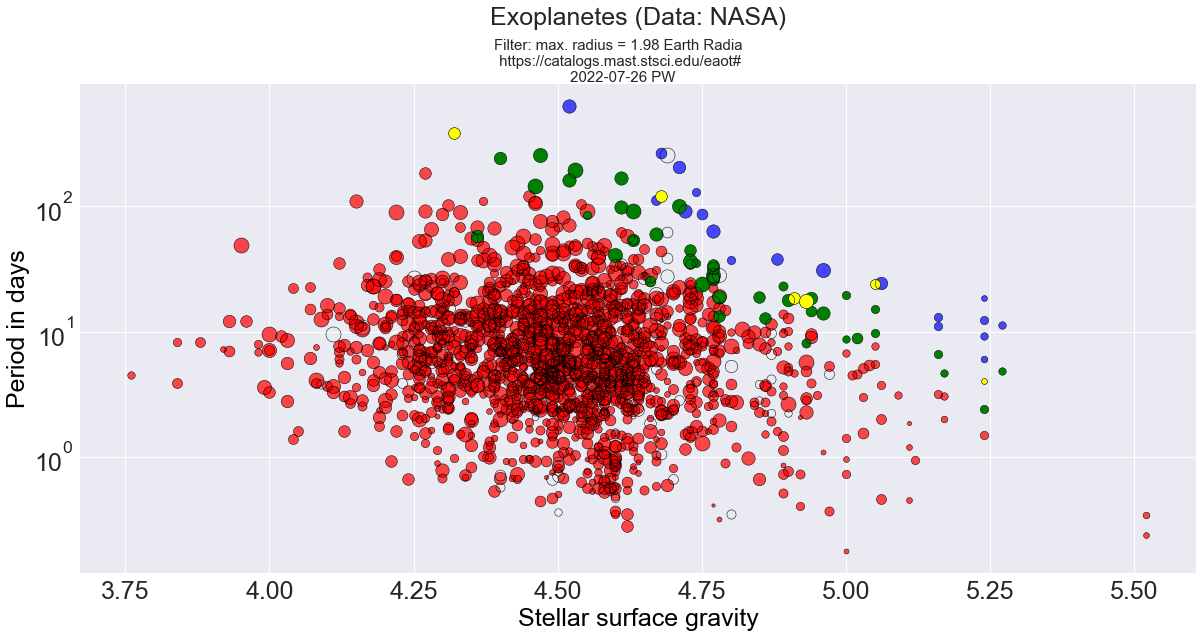

In [71]:
plt.clf()

def y_axis_thousands(x, pos):
    # 'The two args are the value and tick position'
    return '{:0,d}'.format(int(x)).replace(",", ".")

plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(20, 9))
formatter = FuncFormatter(y_axis_thousands)
ax.yaxis.set_major_formatter(formatter)

# Temperature < 100°C
[ax.plot(
         row['log10g_s'], row['Period'], '.', 
         markersize=row['marker_size']*1, 
         alpha=0.7, 
         color = "blue" if row['Teq'] <= 273 else 'None',
         label = "") for idx, row in df.iterrows()]

# Temperature > 100°C
[ax.plot(
         row['log10g_s'], row['Period'], '.', 
         markersize=row['marker_size']*1, 
         alpha=0.7, 
         color = "red" if row['Teq'] >= 373 else 'None',
         label = "") for idx, row in df.iterrows()]

# Temperature 0°C to 100°C
[ax.plot(
         row['log10g_s'], row['Period'], '.', 
         markersize=row['marker_size']*1, 
         alpha=1, 
         color = "green" if 273 <= row['Teq'] <= 373 else 'None',
         label = "") for idx, row in df.iterrows()]

# Temperature 0°C to 100°C
[ax.plot(
         row['log10g_s'], row['Period'], '.', 
         markersize=row['marker_size']*1, 
         alpha=1, 
         color = "yellow" if 282 <= row['Teq'] <= 292 else 'None',
         markeredgewidth=0.5,
         markeredgecolor = 'black',
         label = "") for idx, row in df.iterrows()]

ax.set_xlabel("Stellar surface gravity", color="black", fontsize=25)
ax.set_ylabel("Period in days", color="black", fontsize=25)
ax.set_yscale('log')
# ax.set_xscale('log')

ax.tick_params(labelsize=25)

# plt.legend(loc='center',
#            bbox_to_anchor=(0.5, -0.25),
#            fancybox=True,
#            shadow=True,
#            ncol=3,
#            fontsize=20)

plt.title(f' Exoplanetes (Data: NASA) \n\n', fontsize=25)


# place a text box in upper left in axes coords
#      (x, y)
# ax.text(0.05, 0.76, "Mars", transform=ax.transAxes, fontsize=16, verticalalignment='top')
# ax.text(0.05, 0.71, "Earth", transform=ax.transAxes, fontsize=16, verticalalignment='top')
# ax.text(0.05, 0.665, "Venus", transform=ax.transAxes, fontsize=16, verticalalignment='top')
# ax.text(0.05, 0.59, "Mercury", transform=ax.transAxes, fontsize=16, verticalalignment='top')
# ax.text(0.78, 0.72, "Kepler-452 b", transform=ax.transAxes, fontsize=16, verticalalignment='top')
# ax.text(0.73, 0.61, "Kepler-62 e", transform=ax.transAxes, fontsize=16, verticalalignment='top')



plt.suptitle(f'Filter: max. radius = {max_größe} Earth Radia \n https://catalogs.mast.stsci.edu/eaot# \n {now} PW', fontsize=15, y=0.95)

plt.savefig(f'{pfad}Exeoplanets_2.png', dpi=300, bbox_inches='tight')
